# Error propagation

Estimate the error of a function according to the errors of its vaiables

https://en.wikipedia.org/wiki/Propagation_of_uncertainty

In [3]:
from sympy import init_printing, symbols, Symbol, Derivative, sqrt, log, Eq
from IPython.display import display
init_printing(use_latex=True, latex_mode='equation*') 

Define a mathematical function $G(t, \theta_s, \theta_0, \theta_t)$ :

In [4]:
g, t, theta_s, theta_0, theta_t = symbols ('g, t, theta_s, theta_0, theta_t')

Delta_g = Symbol('\Delta g')
Delta_t = Symbol('\Delta t')
Delta_theta = Symbol('\Delta \Theta')

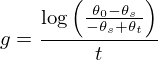

In [5]:
variables = (t, theta_s, theta_0, theta_t)

deltadict =	{
        t: Delta_t,
        theta_s: Delta_theta,
        theta_0: Delta_theta,
        theta_t: Delta_theta}

def G(*variables):
    return 1/t * log( (theta_0 - theta_s) / (theta_t - theta_s) )

display(Eq(g, G(*variables)))

Calculate the partial derevitives of the function G for each of its variables, sum up the squares of the obtained derivatives:

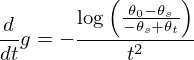

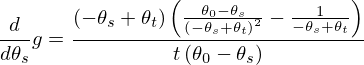

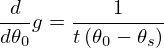

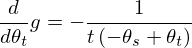

In [6]:
g_sum_squares = 0
G_sum_squares = 0

for variable in variables:
    g_derivative = Derivative(g,variable) 
    G_derivative = Derivative(G(*variables), variable)
    display(Eq(g_derivative, G_derivative.doit()))
    g_sum_squares = g_sum_squares + (g_derivative * deltadict[variable])**2
    G_sum_squares = G_sum_squares + (G_derivative * deltadict[variable])**2

The square root of the sum is the estimated error of the function G

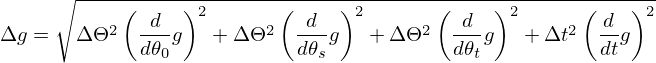

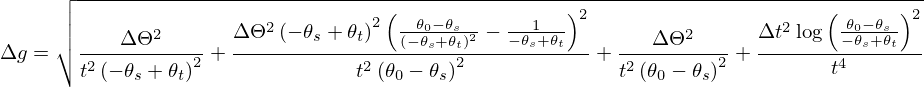

In [7]:
Delta_G = sqrt (G_sum_squares)
Delta_g_ = sqrt (g_sum_squares)

display(Eq(Delta_g,Delta_g_))
display(Eq(Delta_g,Delta_G.doit()))